# ECE 590, Fall 2019 
## Problem Set 1 
* ### __Important :__  You are only allowed to use the Python built in function for generating uniform random variables.

## Full name: Yifei Wang


In [1]:
from random import random
import numpy as np
import matplotlib.pyplot as plt

### Problem 1 (Exponential distribution)

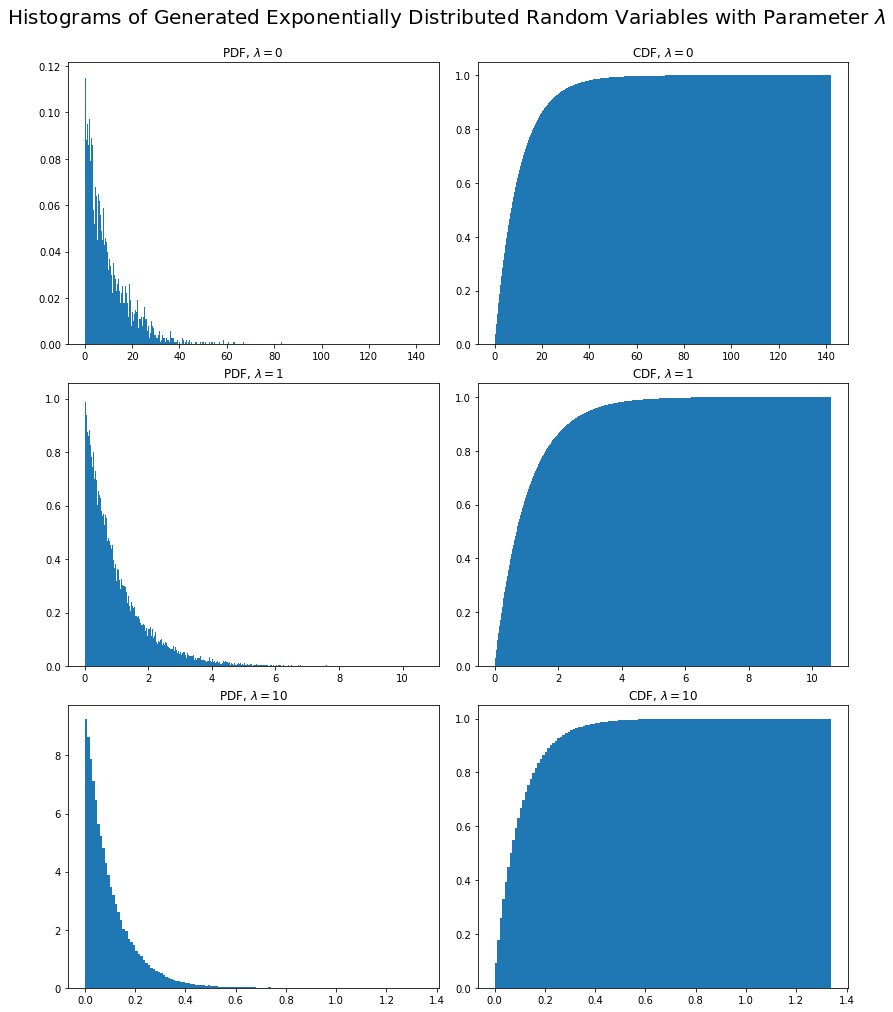

In [2]:
lambda_ = [0.1, 1, 10]
fig, axs = plt.subplots(3, 2, figsize=(13, 15))
for i in range(3):
    Unif = np.array([random() for _ in range(10**5)])
    Exp = -np.log(1 - Unif) / lambda_[i]
    axs[i, 0].hist(Exp, bins=np.arange(0, Exp.max()+0.01, 0.01), density=True)
    axs[i, 0].set_title(r"PDF, $\lambda = %d$" % lambda_[i])
    axs[i, 1].hist(Exp, bins=np.arange(0, Exp.max()+0.01, 0.01), density=True, cumulative=True)
    axs[i, 1].set_title(r"CDF, $\lambda = %d$" % lambda_[i])
fig.suptitle(r"Histograms of Generated Exponentially Distributed Random Variables with Parameter $\lambda$", fontsize=20)
plt.tight_layout(pad=6, h_pad=0.5, w_pad=1)
plt.show()

### Problem 2 (Gamma distribution)

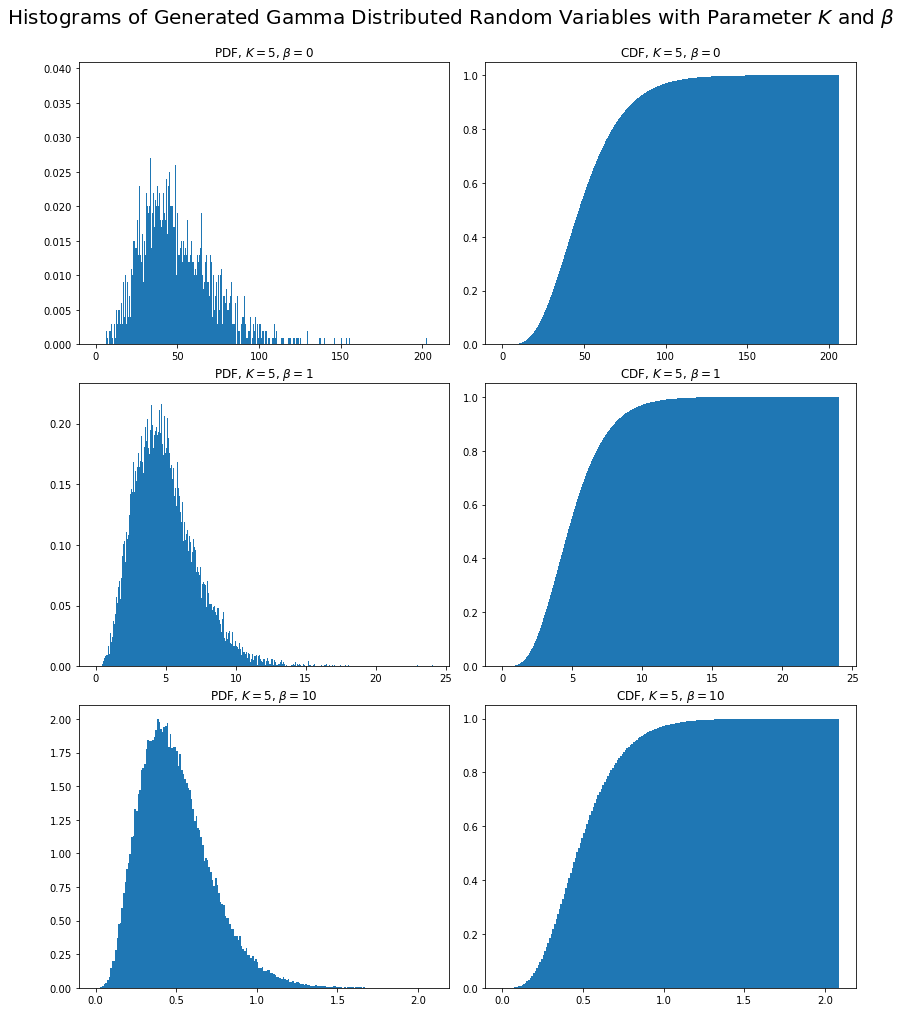

In [3]:
beta = [0.1, 1, 10]
K = 5
fig, axs = plt.subplots(3, 2, figsize=(13, 15))
for i in range(3):
    Gam = np.zeros(10**5)
    for _ in range(K):
        Unif = np.array([random() for _ in range(10**5)])
        Exp = -np.log(1 - Unif) / beta[i]
        Gam += Exp
    axs[i, 0].hist(Gam, bins=np.arange(0, Gam.max()+0.01, 0.01), density=True)
    axs[i, 0].set_title(r"PDF, $K = 5$, $\beta = %d$" % beta[i])
    axs[i, 1].hist(Gam, bins=np.arange(0, Gam.max()+0.01, 0.01), density=True, cumulative=True)
    axs[i, 1].set_title(r"CDF, $K = 5$, $\beta = %d$" % beta[i])
fig.suptitle(r"Histograms of Generated Gamma Distributed Random Variables with Parameter $K$ and $\beta$", fontsize=20)
plt.tight_layout(pad=6, h_pad=0.5, w_pad=1)
plt.show()

### Problem 3 (Beta distribution)

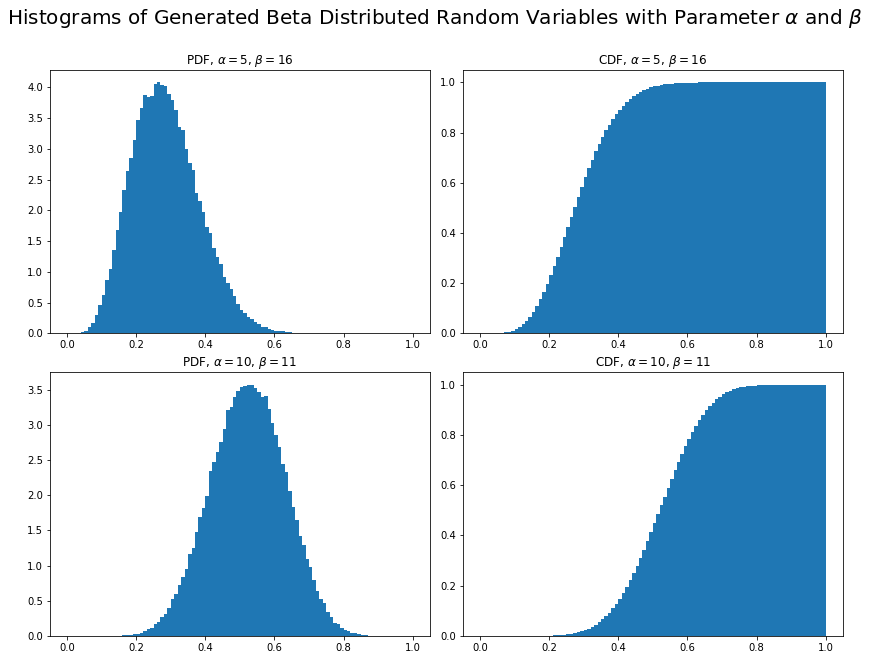

In [4]:
alpha = [5, 10]
beta = [16, 11]
fig, axs = plt.subplots(2, 2, figsize=(13, 10))
for i in range(2):
    a = alpha[i]
    b = beta[i]
    k = a
    n = b + k - 1
    Unif = np.array([[random() for _ in range(10**5)] for _ in range(n)])
    Beta = np.sort(Unif, axis=0)[k]
    axs[i, 0].hist(Beta, bins=np.arange(0, 1+0.01, 0.01), density=True)
    axs[i, 0].set_title(r"PDF, $\alpha = %d$, $\beta = %d$" % (a, b))
    axs[i, 1].hist(Beta, bins=np.arange(0, 1+0.01, 0.01), density=True, cumulative=True)
    axs[i, 1].set_title(r"CDF, $\alpha = %d$, $\beta = %d$" % (a, b))
fig.suptitle(r"Histograms of Generated Beta Distributed Random Variables with Parameter $\alpha$ and $\beta$", fontsize=20)
plt.tight_layout(pad=6, h_pad=0.5, w_pad=1)
plt.show()

### Problem 4 (Dirichlet distribution)

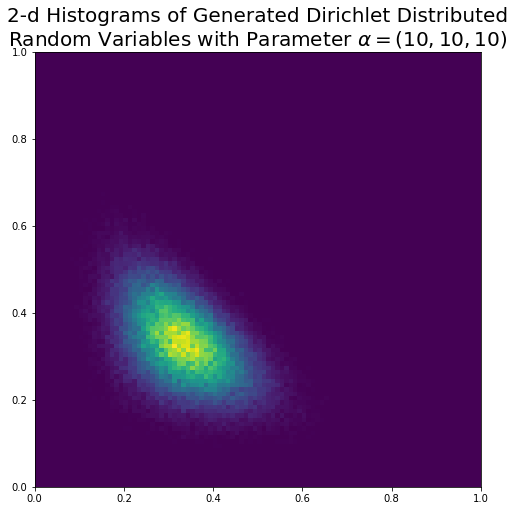

In [5]:
alpha = [10, 10, 10]
N = 3
beta = 1

Gam = np.zeros((N, 10**5))
for n in range(N):
    for _ in range(alpha[n]):
        Unif = np.array([random() for _ in range(10**5)])
        Exp = -np.log(1 - Unif) / beta
        Gam[n] += Exp
Dir = Gam / Gam.sum(axis=0)
plt.figure(figsize=(8, 8))
plt.hist2d(Dir[0, :], Dir[1, :], bins=[np.arange(0, 1.01, 0.01), np.arange(0, 1.01, 0.01)], density=True)
plt.title("2-d Histograms of Generated Dirichlet Distributed\n" + r"Random Variables with Parameter $\alpha=(10,10,10)$", fontsize=20)
plt.show()

In [6]:
# X1Beta(10 ,20)
# 

alpha = [10, 10, 10]

Dir = np.zeros((3, 10**5))
for i in range(len(alpha)-1):
    a = alpha[i]
    b = sum(alpha[(i+1):])
    k = a
    n = b + k - 1
    Unif = np.array([[random() for _ in range(10**5)] for _ in range(n)])
    Beta = np.sort(Unif, axis=0)[k]
    Dir[i] = (1 - Dir[:i].sum(axis=0)) * Beta
Dir[2] = 1 - Dir.sum(axis=0)

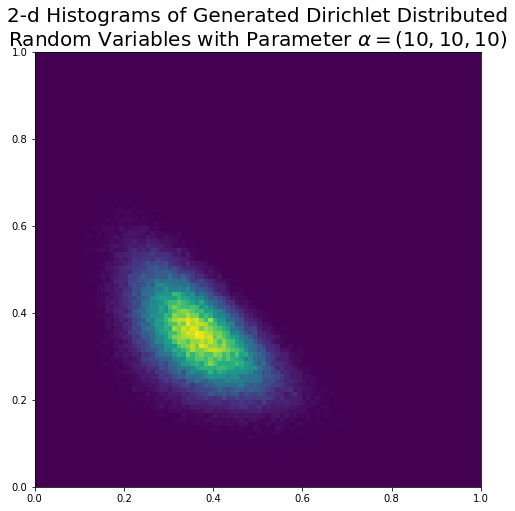

In [7]:
plt.figure(figsize=(8, 8))
plt.hist2d(Dir[0, :], Dir[1, :], bins=[np.arange(0, 1.01, 0.01), np.arange(0, 1.01, 0.01)], density=True)
plt.title("2-d Histograms of Generated Dirichlet Distributed\n" + r"Random Variables with Parameter $\alpha=(10,10,10)$", fontsize=20)
plt.show()